<a href="https://colab.research.google.com/github/yakkunn7422/public_colab/blob/main/2024_AIC2_thema1_main2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!rm -fr /content/sample_data/new_train_images
!rm -fr /content/sample_data/test_images.zip
!rm -fr /content/sample_data/train_images.zip
!rm -fr /content/sample_data/train_master.tsv
!rm -fr /content/sample_data/sample_submit.tsv
!rm -fr /content/sample_data/resnet18-5c106cde.pth
!rm -fr /content/sample_data/label_master.tsv


In [2]:
import os
print("カレントワーキングディレクトリは[" + os.getcwd() + "]です")

カレントワーキングディレクトリは[/content]です


In [2]:
# sample_data 配下にResnet18使う際のデータ一式を持ってくるコード

import os
import pandas as pd
import zipfile
import shutil
import numpy as np

#trainイメージファイル、testイメージファイル等のファイル格納先
input_dir = '/content/drive/MyDrive/2024_AIContest2/Thema1'
work_dir =  '/content/sample_data'

#trainデータの解凍・成形先のディレクトリ
output_dir = os.path.join(work_dir, 'new_train_images')

#trainデータファイル名
zip_file_path = os.path.join(work_dir, 'train_images.zip')
#trainデータのラベルまとめファイル名
tsv_file_path = os.path.join(work_dir, 'train_master.tsv')

# ファイルをCOPYする
def simple_copy_files(src_dir, dst_dir):
    os.makedirs(dst_dir, exist_ok=True)  # コピー先ディレクトリを作成（既に存在する場合は何もしない）

    for file_name in os.listdir(src_dir):
        full_file_name = os.path.join(src_dir, file_name)
        if os.path.isfile(full_file_name):
            shutil.copy2(full_file_name, dst_dir)  # ファイルのコピー

# トレインとバリデーション用のディレクトリおよびその中のラベルごとのサブディレクトリを作成する
def create_directories(base_dir, labels):

    train_dir = os.path.join(base_dir, 'train')
    val_dir = os.path.join(base_dir, 'val')

    for dir_path in [train_dir, val_dir]:
        if not os.path.exists(dir_path):
            os.makedirs(dir_path)

    for label in labels:
        os.makedirs(os.path.join(train_dir, str(label)), exist_ok=True)
        os.makedirs(os.path.join(val_dir, str(label)), exist_ok=True)

    return train_dir, val_dir

# ZIPファイルを解凍する
def extract_zip(zip_file_path, extract_to):

    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

# TSVファイルを読み込み、1行目を削除してデータフレームを準備する
def load_and_prepare_data(tsv_file_path):

    df = pd.read_csv(tsv_file_path, sep='\t', names=['filename', 'label_id'])
    df = df.iloc[1:].reset_index(drop=True)

    return df

# 画像ファイルをディレクトリに分配する
def distribute_images(df, image_dir, train_dir, val_dir, train_ratio=0.8):

    for label in df['label_id'].unique():
        label_images = df[df['label_id'] == label]['filename'].tolist()
        # シャッフルして分割

        np.random.shuffle(label_images)
        train_size = int(len(label_images) * train_ratio)
        train_images = label_images[:train_size]
        val_images = label_images[train_size:]

        for image_name in train_images:
            src_path = os.path.join(image_dir, image_name)
            dst_path = os.path.join(train_dir, str(label), image_name)
            shutil.copy(src_path, dst_path)

        for image_name in val_images:
            src_path = os.path.join(image_dir, image_name)
            dst_path = os.path.join(val_dir, str(label), image_name)
            shutil.copy(src_path, dst_path)

# ディレクトリ内のアイテムを探索し数を表示する
def count_files_recursive(directory):
    total_files = 0

    for root, dirs, files in os.walk(directory):
        files_count = len(files)
        subdir_relative = os.path.relpath(root, directory)
        print(f"Directory '{subdir_relative}' contains {files_count} files.")

        total_files += files_count

    print(f"Total files in '{directory}': {total_files}")

# メイン処理を実行する関数
def main(zip_file_path, tsv_file_path, output_dir, train_ratio=0.8):

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    df = load_and_prepare_data(tsv_file_path)

    extract_zip(zip_file_path, output_dir)

    labels = df['label_id'].unique()

    train_dir, val_dir = create_directories(output_dir, labels)
    image_dir = os.path.join(output_dir, 'train_images')

    distribute_images(df, image_dir, train_dir, val_dir, train_ratio)

    # 解凍後のディレクトリを削除
    if os.path.exists(image_dir):
        shutil.rmtree(image_dir)
        print(f"Deleted temporary directory: {image_dir}")

# 実行
# INPUTディレクトリのファイルをOUTPUTディレクトリにすべてCOPY
simple_copy_files(input_dir,work_dir)
# Train.zipファイル内の画像をtrain、val毎(割合い0.8)かつラベル毎のディレクトリに配置
main(zip_file_path, tsv_file_path, output_dir, train_ratio=0.8)

count_files_recursive(output_dir)


Deleted temporary directory: /content/sample_data/new_train_images/train_images
Directory '.' contains 0 files.
Directory 'train' contains 0 files.
Directory 'train/7' contains 400 files.
Directory 'train/0' contains 400 files.
Directory 'train/8' contains 400 files.
Directory 'train/1' contains 400 files.
Directory 'train/5' contains 400 files.
Directory 'train/6' contains 400 files.
Directory 'train/3' contains 400 files.
Directory 'train/9' contains 400 files.
Directory 'train/4' contains 400 files.
Directory 'train/2' contains 400 files.
Directory 'val' contains 0 files.
Directory 'val/7' contains 100 files.
Directory 'val/0' contains 100 files.
Directory 'val/8' contains 100 files.
Directory 'val/1' contains 100 files.
Directory 'val/5' contains 100 files.
Directory 'val/6' contains 100 files.
Directory 'val/3' contains 100 files.
Directory 'val/9' contains 100 files.
Directory 'val/4' contains 100 files.
Directory 'val/2' contains 100 files.
Total files in '/content/sample_data/n

train:フェイズ
   loaders:1回目    loss:2.3733956813812256
   loaders:2回目    loss:2.427035093307495
   loaders:3回目    loss:2.3324151039123535
   loaders:4回目    loss:2.2628393173217773
   loaders:5回目    loss:2.3137917518615723
   loaders:6回目    loss:2.268838405609131
   loaders:7回目    loss:2.2341723442077637
   loaders:8回目    loss:2.266143321990967
   loaders:9回目    loss:2.236152172088623
   loaders:10回目    loss:2.1561594009399414
   loaders:11回目    loss:2.1051149368286133
   loaders:12回目    loss:2.1020047664642334
   loaders:13回目    loss:2.021026134490967
   loaders:14回目    loss:2.1151137351989746
   loaders:15回目    loss:2.135594129562378
   loaders:16回目    loss:2.014498472213745
   loaders:17回目    loss:2.0316598415374756
   loaders:18回目    loss:1.9860150814056396
   loaders:19回目    loss:1.960947036743164
   loaders:20回目    loss:1.9632543325424194
   loaders:21回目    loss:2.006922721862793
   loaders:22回目    loss:1.7876840829849243
   loaders:23回目    loss:1.893104076385498
   loaders:24回目    

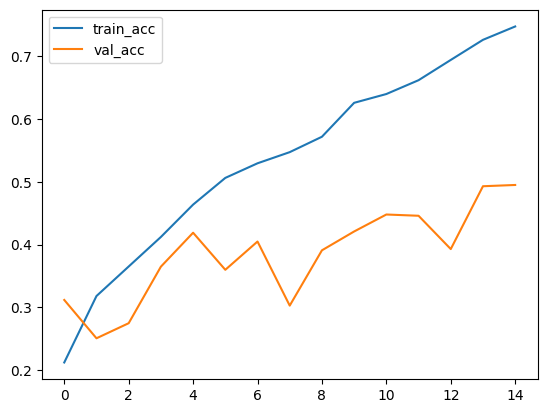

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import zipfile
import torch
import torch.nn as nn
import torch.optim as optim
import albumentations
from torch.utils.data import Dataset
from torchvision import datasets, models, transforms
from PIL import Image, ImageFilter

input_dir = '/content/drive/MyDrive/2024_AIContest2/Thema1'
work_dir =  '/content/sample_data'


#定数設定
DEVICE= "cpu"
TARGET_NUM = 10
BATCH_SIZE = 128
LEARNING_RATE = 0.005
EPOCH = 15
TRANSFER_LEARNING = False
MODEL_LEARNING = True

#transforms定義
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(256),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]),
}

#dataset作成
image_datasets = {
    'train': datasets.ImageFolder('/content/sample_data/new_train_images/train',data_transforms['train']),
    'val': datasets.ImageFolder('/content/sample_data/new_train_images/val',data_transforms['val'])
}

#dataloaders作成
image_dataloaders = {
    'train': torch.utils.data.DataLoader(image_datasets['train'], batch_size=BATCH_SIZE, shuffle=True, num_workers=0, drop_last=True),
    'val': torch.utils.data.DataLoader(image_datasets['val'], batch_size=BATCH_SIZE, shuffle=False, num_workers=0, drop_last=True),
}

#dataサイズ定義
dataset_sizes= {
    'train':len(image_datasets['train']),
    'val':len(image_datasets['val'])
}

if not MODEL_LEARNING:
    print("処理を停止します。")
    sys.exit()  # プログラムを終了

#ResNet18モデル定義
def get_model(target_num,isPretrained=False):

    if(isPretrained):
        model_ft = models.resnet18(pretrained=False)
        model_ft.load_state_dict(torch.load(os.path.join(work_dir, 'resnet18-5c106cde.pth'), map_location=lambda storage, loc: storage), strict=True)
    else:
        model_ft = models.resnet18(pretrained=False)

    model_ft.fc = nn.Linear(512, target_num)
    model_ft = model_ft.to(DEVICE)
    return model_ft

#モデルのインスタンス作成 転移学習なし（FALSE）
model_ft = get_model(target_num=TARGET_NUM,isPretrained=TRANSFER_LEARNING)

#最適化関数定義
optimizer = optim.SGD(model_ft.parameters(),lr=LEARNING_RATE, momentum=0.9)

#loss関数定義
criterion = nn.CrossEntropyLoss()

#モデル訓練用関数
def train_model(model, criterion, optimizer, num_epochs=5,is_saved = False):
    best_acc = 0.0


    train_arr1 = np.zeros(EPOCH)
    val_arr1   = np.zeros(EPOCH)

    # エポック数だけ下記工程の繰り返し
    for epoch in range(num_epochs):

        for phase in ['train', 'val']:
            print('{}:フェイズ'.format(phase))

            # 訓練フェイズと検証フェイズの切り替え
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            # dataloadersからバッチサイズだけデータ取り出し、下記工程（1−5）の繰り返し
            for i,(inputs, labels) in enumerate(image_dataloaders[phase]):
                inputs = inputs.to(DEVICE)
                labels = labels.to(DEVICE)

                # 1. optimizerの勾配初期化
                optimizer.zero_grad()

                # 2.モデルに入力データをinputし、outputを取り出す
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)

                # 3. outputと正解ラベルから、lossを算出
                loss = criterion(outputs, labels)
                print('   loaders:{}回目'.format(i+1)  ,'   loss:{}'.format(loss))

                if phase == 'train':
                    # 4. 誤差逆伝播法により勾配の算出
                    loss.backward()
                    # 5. optimizerのパラメータ更新
                    optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            print('EPOCH{}回目 {} Loss: {:.4f} Acc: {:.4f}'.format(epoch, phase, epoch_loss, epoch_acc))

            if phase == 'train':
                train_arr1[epoch]=epoch_acc
            else:
                val_arr1[epoch]=epoch_acc

            # C. 今までのエポックでの精度よりも高い場合はモデルの保存
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                if(is_saved):
                    print('Save File original_model_{}.pth'.format(epoch))
                    torch.save(model.state_dict(), '/content/drive/MyDrive/2024_AIContest2/Thema1/pth/original_model_{}.pth'.format(epoch))


    print('Best val Acc: {:4f}'.format(best_acc))
    print(train_arr1)
    print(val_arr1)
    train_ser1 = pd.Series(train_arr1,name='train_acc')
    result_data = pd.DataFrame(train_ser1)
    result_data['val_acc']=val_arr1
    result_data.plot()
    plt.show()

train_model(model = model_ft,criterion = criterion,optimizer = optimizer,num_epochs=EPOCH,is_saved = True)


In [ ]:
import pandas as pd
import os
import zipfile
import torch
import torch.nn as nn
import torch.optim as optim
import albumentations
from torch.utils.data import Dataset
from torchvision import datasets, models, transforms
from PIL import Image, ImageFilter

work_dir           = '/content/sample_data'
save_dir           = '/content/drive/MyDrive/2024_AIContest2/Thema1/'
test_zip_file_path = '/content/sample_data/test_images.zip'
test_file_dir      = os.path.join(work_dir, 'test_images')
report_format_tsv  = os.path.join(work_dir, 'sample_submit.tsv')
best_model_path    = os.path.join(save_dir, 'pth/20250316_original_model_7.pth')
output_file        = os.path.join(save_dir, 'pth/20250316_out_submit1.tsv')

TARGET_NUM = 10

# ZIPファイルを解凍する
def extract_zip(zip_file_path, extract_to):

    if not os.path.exists(test_file_dir):
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_to)

extract_zip(test_zip_file_path, work_dir)

#dataサイズ定義
dataset_sizes= {
    'train':len(image_datasets['train']),
    'val':len(image_datasets['val'])
}

#submit用dataset定義
class For_Submission_Datasets(Dataset):

    def __init__(self, data_transform):
        self.df = pd.read_csv(report_format_tsv ,sep='\t',names=['filename','target'])
        self.data_transform = data_transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        file = self.df['filename'][index]
        image = Image.open(test_file_dir +'/'+ file)
        image = self.data_transform(image)

        return image,file

#submit用dataset作成
subdataset = For_Submission_Datasets(data_transform=data_transforms['val'])

#submit用dataloaders作成
subdataloader = torch.utils.data.DataLoader(subdataset, batch_size=1, shuffle=False, num_workers=0, drop_last=True)

#精度の最も高いモデルをロード
#モデルの名前を適宜変更して、最も精度の高いモデルをロードしましょう
best_model = get_model(target_num = TARGET_NUM)
best_model.load_state_dict(torch.load(best_model_path, map_location=lambda storage, loc: storage), strict=True)

submit = pd.read_csv(report_format_tsv,sep='\t', header=None)
#print(submit)
#テストデータに対しての推論
pred = []
for i,(inputs, labels) in enumerate(subdataloader):
    inputs = inputs.to(DEVICE)
    best_model.eval()
    outputs = best_model(inputs)
    _, preds = torch.max(outputs, 1)
    pred.append(preds.item())

df_test = pd.read_csv(report_format_tsv ,sep='\t',names=['filename','target'])

df_test['pred'] = pred
#print(df_test)
submit[1] = pred

submit.to_csv(output_file ,sep='\t', index=False, header=False)
print(submit)
